In [214]:
import pystatsbomb as sb
import pandas as pd

In [215]:
c = sb.Client()

In [216]:
c.get_competitions()

In [217]:
c.competitions[1]

{'competition_id': 49,
 'competition_name': 'NWSL',
 'country_name': 'United States of America',
 'match_available': '2018-06-11T15:34:54.124942',
 'match_updated': '2018-06-11T15:34:54.124942',
 'season_id': 3,
 'season_name': '2018'}

In [218]:
c.get_matches()

In [219]:
c.matches[1]

{'away_score': 1,
 'away_team': {'away_team_id': 761, 'away_team_name': 'Chicago Red Stars'},
 'competition': {'competition_id': 49,
  'competition_name': 'NWSL',
  'country_name': 'United States of America'},
 'data_version': '1.0.2',
 'home_score': 1,
 'home_team': {'home_team_id': 766,
  'home_team_name': 'North Carolina Courage'},
 'kick_off': None,
 'last_updated': '2018-06-11T15:34:54.124942',
 'match_date': '2018-05-06',
 'match_id': 7444,
 'match_status': 'available',
 'referee_name': 'M. Vega',
 'season': {'season_id': 3, 'season_name': '2018'},
 'stadium_name': "Sahlen's Stadium at WakeMed Soccer Park"}

In [220]:
c.get_lineups(match_id=7298)

In [221]:
c.lineups[1]

{'lineup': [{'country': {'id': 220, 'name': 'Sweden'},
   'jersey_number': 15,
   'player_id': 4635,
   'player_name': 'Julia Spetsmark'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 26,
   'player_id': 4637,
   'player_name': 'Ellie Roebuck'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 12,
   'player_id': 4643,
   'player_name': 'Georgia Stanway'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 8,
   'player_id': 4644,
   'player_name': 'Jill Scott'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 11,
   'player_id': 4645,
   'player_name': 'Isobel Christiansen'},
  {'country': {'id': 201, 'name': 'Scotland'},
   'jersey_number': 22,
   'player_id': 4646,
   'player_name': 'Claire Emslie'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 23,
   'player_id': 4648,
   'player_name': 'Abbie McManus'},
  {'country': {'id': 68, 'name': 'England'},
   'jersey_number': 14,
   'player_id': 4649,
  

In [222]:
c.get_events()

In [223]:
events = c.events

In [224]:
len(events)

2960

# To Pandas DataFrames

In [225]:
def getMatchDictChildren(d):
    
    dict_children = {}
    for k,v in d.items():
        if isinstance(v, dict):
            for k, v in v.items():
                dict_children[k] = v
        else:
            dict_children[k] = v
    return dict_children

def getLineupParse(l):
    
    lineup = []
    team_name = l.get('team_name', None)
    team_id = l.get('team_id', None)
    match_id = l.get('match_id', None)
    players = l.get('lineup', 'Structure has changed')
    
    if isinstance(players, list):
        for p in players:
            name = p.get('player_name', None)
            pid = p.get('player_id', None)
            jersey = p.get('jersey_number', None)
            country_id = p.get('country', {'id':None}).get('id', None)
            country_name = p.get('country', {'name':None}).get('name', None)
            
            lineup.append({
                "match_id": match_id,
                "team_name": team_name,
                "team_id": team_id,
                "player_name": name,
                "player_id": pid,
                "jersey_number": jersey,
                "country_id": country_id,
                "country_name": country_name})

            
    else:
        print(players)
    return lineup

# https://stackoverflow.com/questions/6027558/flatten-nested-python-dictionaries-compressing-keys
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [226]:
df_competitions = pd.DataFrame(c.competitions)

In [227]:
df_matches = pd.DataFrame([getMatchDictChildren(match) for match in c.matches])

In [228]:
lineup_list = [getLineupParse(l) for l in c.lineups]
lineup_flat_list = [player for team in lineup_list for player in team]
df_lineups = pd.DataFrame(lineup_flat_list)

In [229]:
df_lineups.head()

country_id              country_name  jersey_number  match_id  player_id  \
0         220                    Sweden             16      7298       4633   
1         241  United States of America             19      7298       4634   
2         171                    Norway              2      7298       4636   
3          68                   England             24      7298       4638   
4         171                    Norway             18      7298       4639   

          player_name  team_id    team_name  
0  Magdalena Ericsson      745  Chelsea LFC  
1        Crystal Dunn      745  Chelsea LFC  
2  Maria Thorisdottir      745  Chelsea LFC  
3         Drew Spence      745  Chelsea LFC  
4        Maren Mjelde      745  Chelsea LFC

In [230]:
flat_events = [flatten(e) for e in c.events]
ekeys = [list(e.keys()) for e in flat_events]
ekeys_all = [i for s in ekeys for i in s]
set_all_keys = set(ekeys_all)
df_events = pd.DataFrame(flat_events, columns=set_all_keys)

In [231]:
df_events.head()

substitution_replacement_name pass_recipient_name pass_shot_assist  index  \
0                           NaN                 NaN              NaN      1   
1                           NaN                 NaN              NaN      2   
2                           NaN                 NaN              NaN      3   
3                           NaN                 NaN              NaN      4   
4                           NaN     Ramona Bachmann              NaN      5   

   tactics_formation shot_follows_dribble bad_behaviour_card_name  \
0              433.0                  NaN                     NaN   
1              352.0                  NaN                     NaN   
2                NaN                  NaN                     NaN   
3                NaN                  NaN                     NaN   
4                NaN                  NaN                     NaN   

                           related_events  shot_technique_id  match_id  \
0                                     NaN                NaN      7298   
1                                     NaN                NaN      7298   
2  [c007670e-f679-4f80-b901-b704130fee05]                NaN      7298   
3  [7fe92118-5965-4033-9b59-29b3947a3d8a]                NaN      7298   
4  [dddef0cb-75ef-4e0e-8f45-e8b7dd9e2c7d]                NaN      7298   

         ...         possession  shot_freeze_frame pass_outcome_name  \
0        ...                  1                NaN               NaN   
1        ...                  1                NaN               NaN   
2        ...                  1                NaN               NaN   
3        ...                  1                NaN               NaN   
4        ...                  2                NaN               NaN   

     position_name  shot_technique_name      location  pass_end_location  \
0              NaN                  NaN           NaN                NaN   
1              NaN                  NaN           NaN                NaN   
2              NaN                  NaN           NaN                NaN   
3              NaN                  NaN           NaN                NaN   
4  Center Midfield                  NaN  [61.0, 40.0]       [63.0, 37.0]   

  pass_length  duel_type_id  shot_outcome_name  
0         NaN           NaN                NaN  
1         NaN           NaN                NaN  
2         NaN           NaN                NaN  
3         NaN           NaN                NaN  
4    3.605551           NaN                NaN  

[5 rows x 98 columns]

# All at Once

In [1]:
import pystatsbomb as sb
import pandas as pd

In [2]:
c = sb.Client(source=None)

In [3]:
c.get_all_sb_data(toPandas=True)

In [4]:
c.df_events.shape

(27210, 116)

# Events

In [6]:
c.df_events['type_name'].value_counts()

Pass                 9572
Ball Receipt*        8249
Pressure             3254
Ball Recovery        1415
Duel                  531
Block                 517
Clearance             406
Dribble               405
Goal Keeper           394
Miscontrol            337
Shot                  325
Dribbled Past         277
Interception          251
Camera On             244
Dispossessed          230
Foul Committed        221
Foul Won              215
Camera off             65
Substitution           60
Half End               44
Half Start             44
Injury Stoppage        32
50/50                  30
Starting XI            22
Shield                 17
Tactical Shift         13
Offside                10
Player Off              7
Player On               7
Error                   6
Bad Behaviour           4
Referee Ball-Drop       2
Own Goal Against        2
Own Goal For            2
Name: type_name, dtype: int64

In [234]:
set_all_keys

{'bad_behaviour_card_id',
 'bad_behaviour_card_name',
 'ball_receipt_outcome_id',
 'ball_receipt_outcome_name',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'dribble_nutmeg',
 'dribble_outcome_id',
 'dribble_outcome_name',
 'dribble_overrun',
 'duel_outcome_id',
 'duel_outcome_name',
 'duel_type_id',
 'duel_type_name',
 'duration',
 'foul_committed_advantage',
 'foul_committed_offensive',
 'foul_won_advantage',
 'foul_won_defensive',
 'goalkeeper_body_part_id',
 'goalkeeper_body_part_name',
 'goalkeeper_outcome_id',
 'goalkeeper_outcome_name',
 'goalkeeper_position_id',
 'goalkeeper_position_name',
 'goalkeeper_technique_id',
 'goalkeeper_technique_name',
 'goalkeeper_type_id',
 'goalkeeper_type_name',
 'id',
 'index',
 'injury_stoppage_in_chain',
 'interception_outcome_id',
 'interception_outcome_name',
 'location',
 'match_id',
 'minute',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_backheel',
 'pass_body_part_id',
 'pass

## Passes

In [235]:
pass_values = [
    'index', 'duration', 'id', 'period','minute','second', 'player_name',
    'position_name',
    'possession_team_name', 'possession', 'possession_team_id',
    'related_events', 'under_pressure', 'location', 
    # Pass details
    'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_backheel', 
    'pass_body_part_id', 'pass_body_part_name', 'pass_cross', 'pass_deflected', 
    'pass_end_location', 'pass_goal_assist', 'pass_height_id', 'pass_height_name', 
    'pass_length', 'pass_outcome_id', 'pass_outcome_name', 'pass_recipient_id', 
    'pass_recipient_name', 'pass_shot_assist', 'pass_switch', 'pass_through_ball',
    'pass_type_id', 'pass_type_name']

In [236]:
df_passes = df_events.loc[df_events['type_name'].isin(['Pass']), pass_values]

In [237]:
df_passes['pass_outcome_name'].value_counts()

Incomplete      216
Out              23
Pass Offside      4
Unknown           3
Name: pass_outcome_name, dtype: int64

In [238]:
df_passes.under_pressure.value_counts()

True    214
Name: under_pressure, dtype: int64

# Shots

In [244]:
shot_values = [
    'index', 'duration', 'id', 'period','minute','second', 'player_name',
    'position_name', 'possession_team_name', 'possession', 'possession_team_id',
    'related_events', 'under_pressure', 'location', 
    # Shot details
    'shot_body_part_id', 'shot_body_part_name', 'shot_end_location',
    'shot_first_time', 'shot_follows_dribble', 'shot_freeze_frame',
    'shot_key_pass_id', 'shot_outcome_id', 'shot_outcome_name', 
    'shot_statsbomb_xg', 'shot_technique_id', 'shot_technique_name',
    'shot_type_id', 'shot_type_name',
]

In [245]:
df_shots = df_events.loc[df_events['type_name'].isin(['Shot']), shot_values]

In [248]:
df_shots['shot_outcome_name'].value_counts()

Blocked    12
Off T       9
Saved       8
Goal        4
Wayward     1
Name: shot_outcome_name, dtype: int64

# Plotting

# Plotting

In [ ]:
import numpy as np
def getArrow(start, end, color, qualifier=None):
    x = start[0]
    y = start[1]
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    if color == qualifier:
        color = 'b'
    else:
        color = 'r'
    return x, y, dx, dy, color

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.patches import Arc
import seaborn as sns

%matplotlib inline

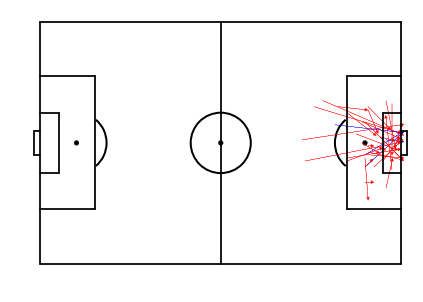

In [257]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([18,18],[62,18],color="black")
plt.plot([0,18],[62,62],color="black")
plt.plot([18,0],[18,18],color="black")

#Right Penalty Area
plt.plot([120,102],[62,62],color="black")
plt.plot([102,102],[62,18],color="black")
plt.plot([102,120],[18,18],color="black")

#Left 6-yard Box
plt.plot([0,6],[50,50],color="black")
plt.plot([6,6],[50,30],color="black")
plt.plot([6,0],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114],[50,50],color="black")
plt.plot([114,114],[50,30],color="black")
plt.plot([114,120],[30,30],color="black")

# Left Goal
plt.plot([0,-2],[44,44],color="black")
plt.plot([-2,-2],[44,36],color="black")
plt.plot([-2,0],[36,36],color="black")

# Right Goal
plt.plot([120,122],[44,44],color="black")
plt.plot([122,122],[44,36],color="black")
plt.plot([122,120],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),10,color="black",fill=False, lw=2)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((12,40),0.8,color="black")
rightPenSpot = plt.Circle((108,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=20,width=20,angle=0,theta1=310,theta2=50,color="black",lw=2)
rightArc = Arc((108,40),height=20,width=20,angle=0,theta1=130,theta2=230,color="black",lw=2)

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

# Pass map
#for line in df_passes[['location', 'pass_end_location', 'pass_outcome_name']].iterrows():
#    x,y,dx,dy,c = getArrow(line[1][0], line[1][1], line[1][2], 'None')
#    ax.arrow(x, y, dx, dy, head_width=1, head_length=1, fc=c, ec=c)

# Shot map
for shot in df_shots[['location', 'shot_end_location', 'shot_outcome_name']].iterrows():
    x,y,dx,dy,c = getArrow(shot[1][0], shot[1][1], shot[1][2], 'Goal')
    ax.arrow(x, y, dx, dy, head_width=1, head_length=1, fc=c, ec=c)    
    
#sns.regplot(df_shot["x"],df_shot["y"], fit_reg=False)#, shade=True,n_levels=50)
#team1 = df_shot[df_shot.team == 'Chelsea LFC']
#team2 = df_shot[df_shot.team != 'Chelsea LFC']

#sns.kdeplot(team1["x"], team1["y"], shade=False, shade_lowest=False, n_levels=50, cmap="Reds", ax=ax)
#sns.kdeplot(team2["x"], team2["y"], shade=False, shade_lowest=False, n_levels=50, cmap="Blues", ax=ax)
#sns.regplot(team1["x"], team1["y"], fit_reg=False, color="red", ax=ax)
#sns.regplot(team2["x"], team2["y"], fit_reg=False, color="blue", ax=ax)

plt.ylim(-5, 85)
plt.xlim(-5, 125)


#Display Pitch
plt.show()